# 1. Install Dependencies and Setup

In [1]:
#installing dependencies(libraries and modules) for our project
#!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [3]:
from tensorflow.python.platform import _pywrap_tf2

In [4]:
# importing required  libraries
import tensorflow as tf
import os
#import tensorflow_io as tfio

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
import os
import cv2
import imghdr  # check the file extensions
from matplotlib import pyplot as plt

C:\Users\archanaseelan\AppData\Local\Temp\ipykernel_9908\4050827361.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr  # check the file extensions


In [8]:
data_dir = 'data' 

In [9]:
os.listdir(data_dir)

['happy', 'sad']

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
image_exts[2]

'bmp'

In [12]:
#prints folder of directory
for image_class in os.listdir(data_dir): 
    print(image_class)

happy
sad


In [13]:
#prints all the images which is in subdirectory2
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
60632274._UY200_.jpg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_68075.jpg
getty_478389113_970647970450091_99776.jpg
getty_494581822_

In [14]:
img = cv2.imread(os.path.join('data', 'happy', '154006829.jpg'))
img

array([[[ 12,  29,  32],
        [ 10,  29,  32],
        [  9,  28,  31],
        ...,
        [  1,  23,  18],
        [  3,  24,  21],
        [  3,  21,  20]],

       [[ 19,  31,  35],
        [ 15,  30,  33],
        [ 18,  35,  38],
        ...,
        [  0,  23,  18],
        [ 10,  24,  22],
        [  0,  21,  18]],

       [[ 17,  32,  35],
        [ 15,  27,  31],
        [ 22,  37,  40],
        ...,
        [  3,  17,  13],
        [  1,  20,  17],
        [  3,  22,  19]],

       ...,

       [[155,  99, 212],
        [152,  90, 210],
        [159, 101, 209],
        ...,
        [ 82, 114, 149],
        [ 88, 121, 154],
        [ 96, 129, 162]],

       [[157, 102, 211],
        [151,  90, 210],
        [159, 100, 212],
        ...,
        [ 85, 120, 153],
        [ 89, 123, 153],
        [ 92, 126, 156]],

       [[158, 100, 209],
        [148,  90, 208],
        [153,  97, 210],
        ...,
        [ 82, 116, 152],
        [ 82, 116, 152],
        [ 86, 118, 153]]

In [15]:
img.shape

(3744, 5616, 3)

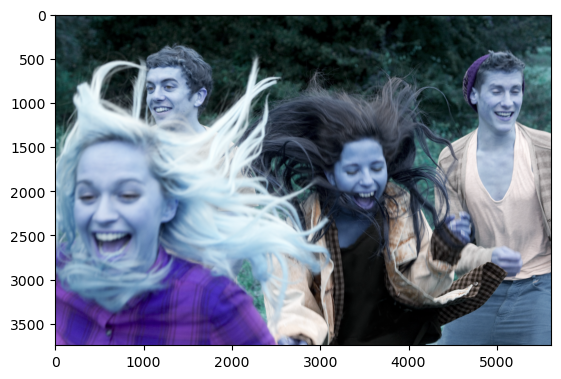

In [16]:
plt.imshow(img)

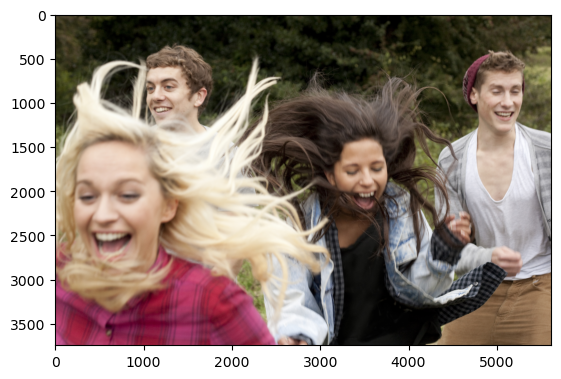

In [17]:
# loads img to normal RGB color
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 288 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
#Gets another batch from the iterator
batch = data_iterator.next()

In [23]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [24]:
# Class 1 = sad ppl
# Class 0 = happy ppl
batch[1]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

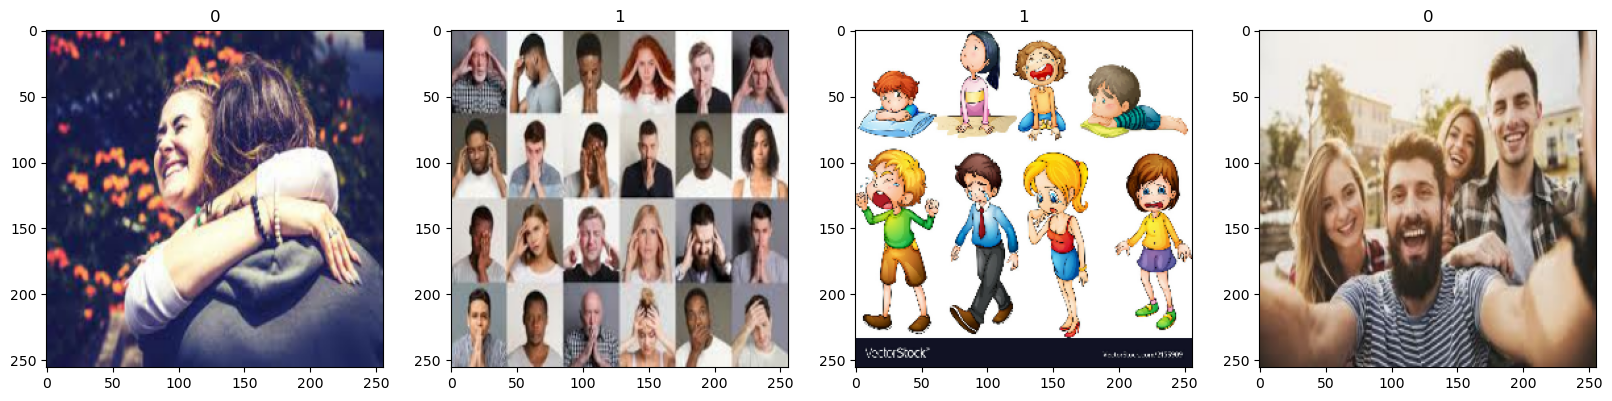

In [25]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[9.45166945e-01, 9.45166945e-01, 9.45166945e-01],
          [9.49019611e-01, 9.49019611e-01, 9.49019611e-01],
          [9.49364305e-01, 9.49364305e-01, 9.49364305e-01],
          ...,
          [1.19500615e-01, 1.23422183e-01, 9.20496359e-02],
          [1.43857226e-01, 1.47778794e-01, 1.16406247e-01],
          [1.33540139e-01, 1.37461707e-01, 1.06089152e-01]],
 
         [[9.45166945e-01, 9.45166945e-01, 9.45166945e-01],
          [9.49019611e-01, 9.49019611e-01, 9.49019611e-01],
          [9.49364305e-01, 9.49364305e-01, 9.49364305e-01],
          ...,
          [1.19711995e-01, 1.23633564e-01, 9.22610089e-02],
          [1.43857226e-01, 1.47778794e-01, 1.16406247e-01],
          [1.38265640e-01, 1.42187208e-01, 1.10814653e-01]],
 
         [[9.46536422e-01, 9.46536422e-01, 9.46536422e-01],
          [9.49093103e-01, 9.49093103e-01, 9.49093103e-01],
          [9.50758278e-01, 9.50758278e-01, 9.50758278e-01],
          ...,
          [1.19845279e-01, 1.23766847e-01, 9.5182

# 5. Split Data

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [29]:
train_size

6

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [37]:
logdir='logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 90s 10s/step - loss: 0.8396 - accuracy: 0.5208 - val_loss: 0.6061 - val_accuracy: 0.6562
Epoch 2/20
6/6 [==============================] - 63s 9s/step - loss: 0.5797 - accuracy: 0.7448 - val_loss: 0.7500 - val_accuracy: 0.6250
Epoch 3/20
6/6 [==============================] - 64s 10s/step - loss: 0.5198 - accuracy: 0.7812 - val_loss: 0.6224 - val_accuracy: 0.6562
Epoch 4/20
6/6 [==============================] - 67s 10s/step - loss: 0.4534 - accuracy: 0.8385 - val_loss: 0.5416 - val_accuracy: 0.7812
Epoch 5/20
6/6 [==============================] - 65s 10s/step - loss: 0.3784 - accuracy: 0.8490 - val_loss: 0.4419 - val_accuracy: 0.5938
Epoch 6/20
6/6 [==============================] - 67s 10s/step - loss: 0.3308 - accuracy: 0.8490 - val_loss: 0.2106 - val_accuracy: 0.9688
Epoch 7/20
6/6 [==============================] - 65s 10s/step - loss: 0.3082 - accuracy: 0.8854 - val_loss: 0.3057 - val_accuracy: 0.8438
Epoch 8/20
6/6 [============

# 8. Plot Performance

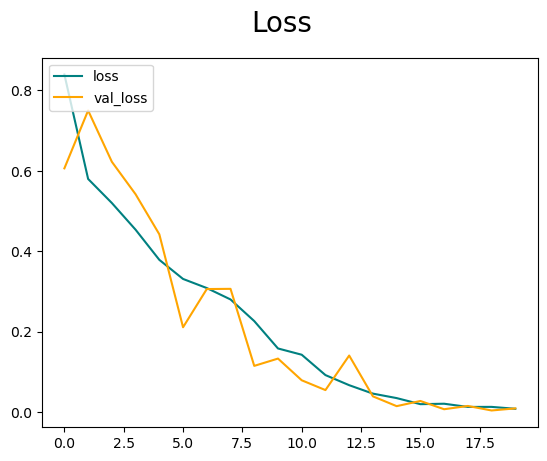

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

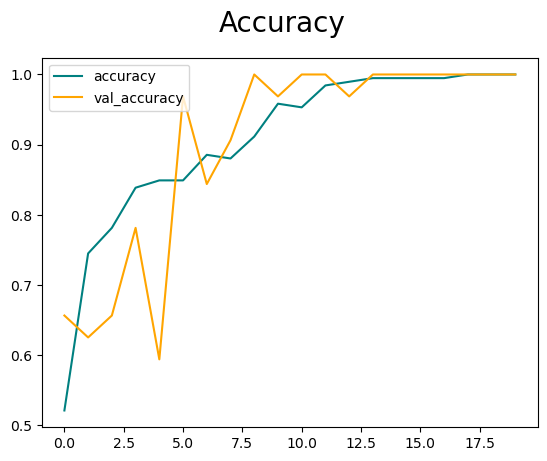

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [45]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [46]:
import cv2

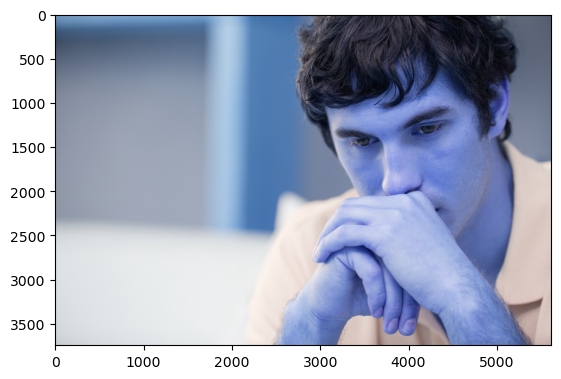

In [47]:
img = cv2.imread('C:/Users/archanaseelan/Desktop/Datascienceprojects/Deeplearningprojects/Deep_CNN_image_classifier//test_images/sad_image.jpg')
plt.imshow(img)
plt.show()

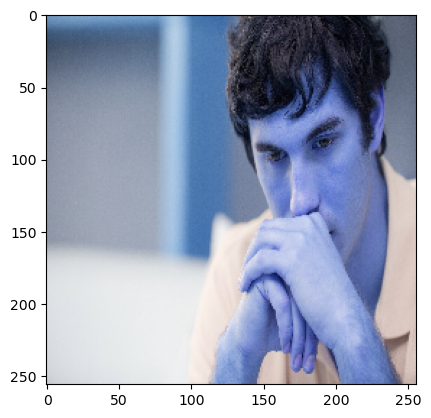

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 1s/step


In [50]:
yhat

array([[0.99860364]], dtype=float32)

In [51]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save(os.path.join('models','happysadmodel.h5'))

In [54]:
new_model = load_model('C:/Users/archanaseelan/Desktop/Datascienceprojects/Deeplearningprojects/Deep_CNN_image_classifier/models/imageclassifier.h5')

In [55]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 798ms/step


array([[0.9844942]], dtype=float32)